<a href="https://colab.research.google.com/github/Purvanshsingh/HDR/blob/master/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [67]:
tf.__version__

'2.3.0'

In [68]:
tf.keras.__version__

'2.4.0'

In [7]:
"""
Loading the open-source mnist Dataset
"""
data = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [10]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
"""
Scaling down all the pixels, by dividing by 256
"""
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

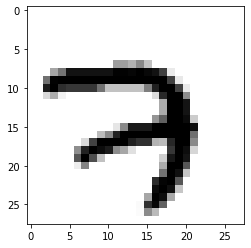

In [17]:
plt.imshow(X_train[0],cmap='binary')

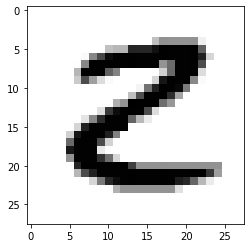

In [19]:
plt.imshow(X_train[250],cmap='binary')

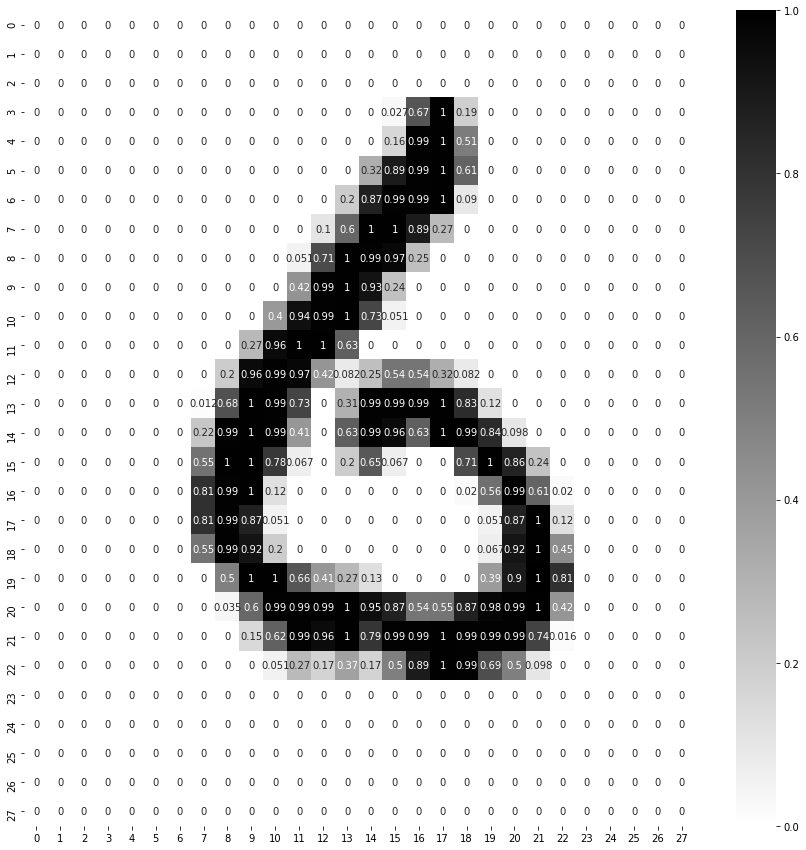

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[750], annot=True, cmap="binary")

In [24]:
X_train.shape

(55000, 28, 28)

In [26]:
X_test.shape

(10000, 28, 28)

In [ ]:
"""
Now we will creat he Artificial Neural Network
"""

In [30]:
Layers = [
        tf.keras.layers.Flatten(input_shape=[28,28],name="Input_Layer"),
        tf.keras.layers.Dense(100,activation='relu',name='hidden_layer1'),
        tf.keras.layers.Dense(10,activation='softmax',name="Output_layer")
        ]

In [31]:
"""
Building the model
"""
model = tf.keras.models.Sequential(Layers)

In [32]:
model.layers

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 100)               78500     
_________________________________________________________________
Output_layer (Dense)         (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
h1_layer = model.layers[1]

In [35]:
h1_layer.name

'hidden_layer1'

In [39]:
h1_layer.get_weights()

[array([[-6.08306229e-02, -3.90107185e-02, -3.19856331e-02, ...,
          5.11628389e-02,  7.32737184e-02, -4.72456962e-03],
        [ 4.86122221e-02,  5.57603091e-02, -2.84969099e-02, ...,
          7.79584646e-02, -7.50596300e-02, -3.73802409e-02],
        [-7.12498128e-02, -6.13117740e-02, -3.70815806e-02, ...,
         -1.86234713e-02,  3.79778445e-04, -6.72866926e-02],
        ...,
        [ 1.28475949e-02,  2.99146622e-02,  3.81970778e-02, ...,
          4.47569638e-02, -8.88655335e-03, -6.93574548e-05],
        [ 4.02139947e-02, -2.58314051e-02, -1.47809535e-02, ...,
         -1.75773725e-02, -8.70612264e-03, -1.46647915e-02],
        [-3.32096368e-02, -5.06634377e-02,  5.23611158e-03, ...,
          2.34123543e-02,  4.54823375e-02,  4.36865389e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [40]:
weights, biases = h1_layer.get_weights()

In [41]:
weights.shape

(784, 100)

In [45]:
model.compile(
    loss=tf.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
              )

In [46]:
Epoch = 50

In [47]:
history = model.fit(X_train,y_train,epochs=Epoch,validation_data=(X_valid,y_valid))

Epoch 1/50
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2864 - accuracy: 0.9184 - val_loss: 0.1484 - val_accuracy: 0.9572
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1286 - accuracy: 0.9622 - val_loss: 0.1031 - val_accuracy: 0.9710
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0912 - accuracy: 0.9729 - val_loss: 0.0893 - val_accuracy: 0.9744
Epoch 4/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0706 - accuracy: 0.9788 - val_loss: 0.0893 - val_accuracy: 0.9706
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0765 - val_accuracy: 0.9780
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0747 - val_accuracy: 0.9764
Epoch 7/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0724 - val_accuracy:

In [48]:
model.save("HDR.h5")

In [49]:
history.params

{'epochs': 50, 'steps': 1719, 'verbose': 1}

In [53]:
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.286358,0.918382,0.148385,0.9572
1,0.128581,0.962182,0.103087,0.9710
2,0.091216,0.972855,0.089318,0.9744
3,0.070574,0.978800,0.089309,0.9706
4,0.055566,0.983036,0.076501,0.9780


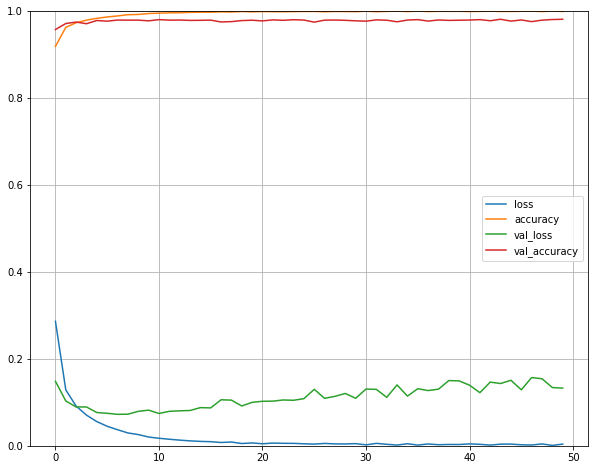

In [59]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [69]:
reloaded_model = tf.keras.models.load_model('HDR.h5')

In [70]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1427 - accuracy: 0.9803


[0.14274154603481293, 0.9803000092506409]

In [90]:
new_test = X_test[100:105]

Actual Images


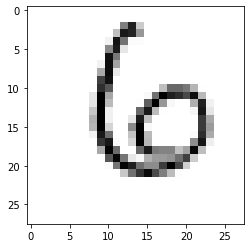

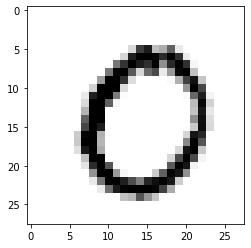

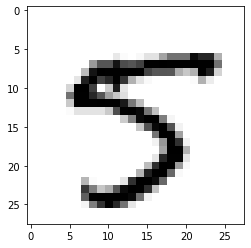

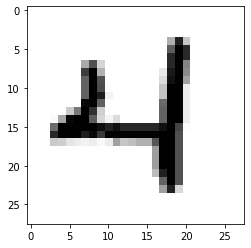

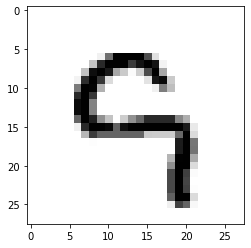

In [91]:
print("Actual Images")
for img in new_test:
  plt.imshow(img,cmap='binary')
  plt.show()

In [92]:
print("Our model Predictions")
np.argmax(model.predict(new_test),axis=-1)

Our model Predictions


array([6, 0, 5, 4, 9])